# Data Review

## Import Libraries

In [10]:
import pandas as pd
import numpy as np

## Read Data

In [11]:
path = r"C:\Users\daeni\Desktop\LOVE\Internships\TSF-Projects\Student Score Prediction Using Supervised ML\Datasets\Student Scores and Study Hours.csv"
student_data = pd.read_csv(path)

## Basic Insights

In [19]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
student_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [15]:
student_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [20]:
student_data.size

50

In [21]:
student_data.shape

(25, 2)

In [16]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Analyzing Individual Feature Patterns Using Visualization

## Import Libraries

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Visualizing the Relationship between Hours and Scores of the Students

In [31]:
student_data[['Hours', 'Scores']].corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


(0.0, 101.82264027456321)

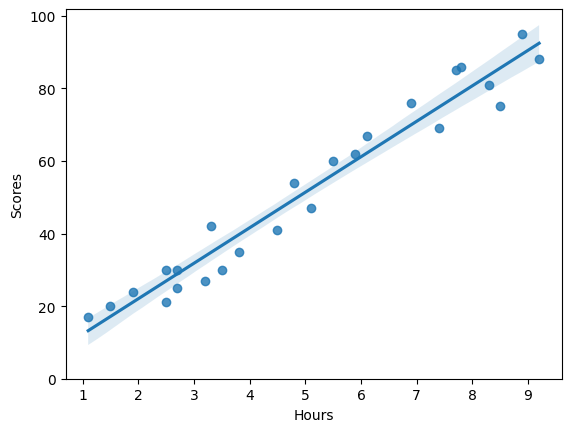

In [29]:
sns.regplot(x="Hours", y="Scores", data=student_data)
plt.ylim(0,)

The more students study, the higher their reflective scores, indicating a positive linear relationship between the two features.

# Model Development

## Import Libraries

In [34]:
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'